<div align="center">

# Assignment 1: Learning from Data and Related Challenges

### Linear Models for Regression

</div>

### 1 Linear regression impact on outliers

#### outliers 
Outliers are data points that differ significantly from other observations from in a dataset. They may be unusually high or low values and can result from varaibility in data, measurements errors or experimental anomalies. Outliers can affect the result of data analysis, especially in regression, by skewing the model or influencing statistical conclusions.

1. You are given a set of data points related to the independent variable (x) and dependent variable (y) in Table 1.

**Table 1: Data set**

| i  | xᵢ | yᵢ    |
|----|----|-------|
| 1  | 0  | 20.26 |
| 2  | 1  | 5.61  |
| 3  | 2  | 3.14  |
| 4  | 3  | -30.00|
| 5  | 4  | -40.00|
| 6  | 5  | -8.13 |
| 7  | 6  | -11.73|
| 8  | 7  | -16.08|
| 9  | 8  | -19.95|
| 10 | 9  | -24.03|

2.  Use all data given in Table 1 to find a linear regression model. Plot x, y as a scatter
 plot and plot your linear regression model in the same scatter plot.

Regression line: y = -3.56x + 3.92


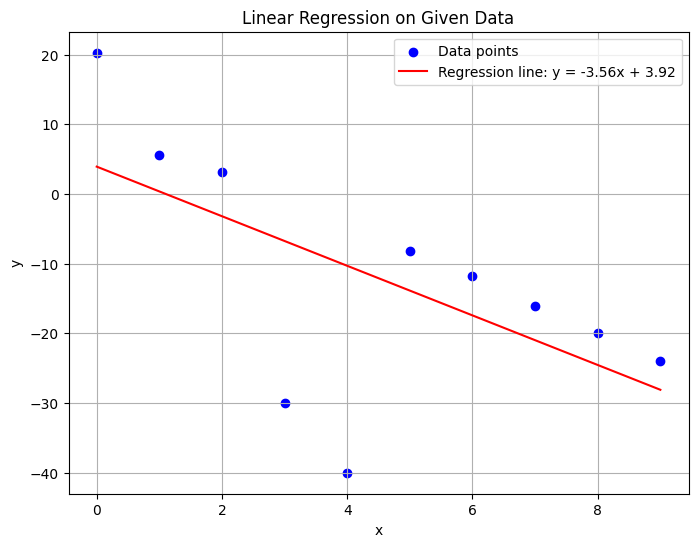

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Data points of the table 1
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([20.26,5.61,3.14,-30.00,-40.00,-8.13,-11.73,-16.08,-19.95,-24.03], dtype=float)

# Fit linear regression model using numpy
a,b = np.polyfit(x, y, 1)     # np.polyfit gives the slope and intercept and fits the line  
                              # 1 = degree of the fitting polynomial
print(f"Regression line: y = {a:.2f}x + {b:.2f}")

# Predicted values
y_pred = a * x + b

# Plot scatter and regression line
plt.figure(figsize=(8,6))
plt.scatter(x, y, color="blue", label="Data points")
plt.plot(x, y_pred, color="red", label=f"Regression line: y = {a:.2f}x + {b:.2f}")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression on Given Data")
plt.legend()
plt.grid(True)
plt.show()


You are given two linear models as follows:
- **Model 1:** $y = -4x + 12$
- **Model 2:** $y = -3.55x + 3.91$

Here, Model 2 is your linear regression model learned in Task 2.

A robust estimator is introduced to reduce the impact of outliers. The robust estimator finds model parameters which minimize the following loss function:

$$
L(\theta, \beta) = \frac{1}{N} \sum_{i=1}^{N} \frac{(y_i - \hat{y}_i)^2}{(y_i - \hat{y}_i)^2 + \beta^2}
$$

where:
- $y_i$ is the actual value
- $\hat{y}_i$ is the predicted value
- $\beta$ is a constant that controls the robustness
- $N$ is the number of data points


A **loss function** measures how well a model's predictions match the actual data. It calculates the error between predicted and true values; lower loss means better fit. In regression, common loss functions include mean squared error (MSE)

An estimator is an algorithm or method used to find the best model parameters (like slope and intercept in linear regression) by minimizing the loss function.

Outliers are data points that are very different from most others. They can have a large impact on the model by increasing the loss, causing the estimator to fit the model poorly for the majority of the data. Outliers can skew the regression line, making predictions less accurate for typical data points. Robust estimators use special loss functions to reduce the influence of outliers and produce a model that better represents the main data trend.

- **Model 1:** $y = -4x + 12$
- **Model 2:** $y = -3.55x + 3.91$    (In the previous question we got $y = -3.56x + 3.92$ )

For the two models given in Task 3, calculate the loss function $L(\theta, \beta)$ for all data samples using equation (1) for the following values of $\beta$:
- $\beta = 1$
- $\beta = 10^{-6}$
- $\beta = 10^{3}$

You may use a computer program to perform these calculations.

In [4]:
def loss_value(y_true, y_pred, beta):
    if (len(y_true) != len(y_pred)):
        raise ValueError("y_true and y_pred must have the same length")
    else:
        term1 = (y_true - y_pred) ** 2
        loss = np.mean(term1 / (term1 + beta**2))
        return loss

# models
model1 = -4*x + 12
model2 = -3.56*x + 3.92

# try different beta values
beta_array = [1.0, 1e-6, 1e3]
results = []

for beta in beta_array:
    loss1 = loss_value(y, model1, beta)
    loss2 = loss_value(y, model2, beta)
    results.append((beta, loss1, loss2))
    print(f"Beta: {beta:g}, Loss1: {loss1:.6f}, Loss2: {loss2:.6f}")


Beta: 1, Loss1: 0.435416, Loss2: 0.973387
Beta: 1e-06, Loss1: 1.000000, Loss2: 1.000000
Beta: 1000, Loss1: 0.000227, Loss2: 0.000188


**Interpretation of Results:**

- For very small $\beta$ ($\beta = 10^{-6}$), the loss function behaves like mean squared error (MSE). All errors, including those from outliers, are counted fully. Both models have a loss close to 1, meaning the errors are significant and outliers have a strong influence.
- For $\beta = 1$, the loss is lower, especially for Model 1. This shows that the robust loss function starts to reduce the impact of large errors (outliers).
- For very large $\beta$ ($\beta = 10^{3}$), the loss values are very small for both models. The denominator dominates, so all errors are down-weighted, and the loss function becomes less sensitive to outliers and even regular errors.

**Summary:**
- Small $\beta$: Outliers have a big effect, loss is high.
- Large $\beta$: Outliers have little effect, loss is low.
- The robust loss function helps control the influence of outliers by adjusting $\beta$.